 Importing Libraries and Packages

In [68]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score 
import statsmodels.api as sm 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [69]:
df_house = pd.read_csv("train.csv")
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [70]:
df_house.shape

(1460, 81)

In [71]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Data Cleaning and Validation

In [73]:
#Checking for dupilcate rows
df_house.duplicated().sum()

0

In [74]:
#Checking for null columns
df_house.isnull().all(axis=0).sum()

0

In [75]:
#Checking the % of NUll Values in the Dataset
pd.set_option('display.max_rows', None)
100*df_house.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [76]:
# Removing columns that has 30% or more missing values
removedcols=[]
for i in df_house.columns:
    if(df_house[i].isnull().mean()*100>=30.00):
        removedcols.append(i)
        
print(removedcols)
df_house.drop(removedcols,axis=1,inplace=True)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [77]:
df_house.shape

(1460, 76)

In [78]:
# Dropping Id colunm as it is not required
df_house=df_house.drop('Id',axis='columns')

In [79]:
#Replacing NA with none
na_columns = ["BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond","MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"]
for i in na_columns:
    df_house[i].fillna("none", inplace=True)

In [80]:
# Replacing the null with median for few columns
df_house["LotFrontage"].fillna(df_house["LotFrontage"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].median(), inplace=True)
df_house["GarageYrBlt"].fillna(df_house["GarageYrBlt"].median(), inplace=True)
df_house['Electrical'] = df_house['Electrical'].fillna(df_house['Electrical'].mode()[0])

In [81]:
#Validating the null values again
100*df_house.isnull().mean().sort_values(ascending=False)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSZoning         0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

Creating drieved variables

In [82]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_house['Total_sqr_footage'] = (df_house['BsmtFinSF1'] + df_house['BsmtFinSF2'] + df_house['1stFlrSF'] + df_house['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df_house['Total_Bathrooms'] = (df_house['FullBath'] + (0.5 * df_house['HalfBath']) + df_house['BsmtFullBath'] + (0.5 * df_house['BsmtHalfBath']))
#Creating derived column for total porch area 
df_house['Total_porch_sf'] = (df_house['OpenPorchSF'] + df_house['3SsnPorch'] + df_house['EnclosedPorch'] + df_house['ScreenPorch'] + df_house['WoodDeckSF'])
#Dropping extra extra columns :
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df_house.drop(extraCols,axis=1,inplace=True)

In [83]:
df_house = df_house.round(decimals = 2)

In [84]:
#Dropping columns which has more single values
ninty_percent = 1460*0.90
dropCols = [] 
for i in df_house.columns :
    if df_house[i].value_counts().max() >= ninty_percent:
        dropCols.append(i)
print(dropCols)
df_house.drop(dropCols,axis=1,inplace=True)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [85]:
df_house.shape# verifying the shape of the dataset


(1460, 50)

In [86]:
# Creating Column for the age of the property
df_house['Garage_age'] = df_house['YrSold'] - df_house['GarageYrBlt']
df_house['Remodel_age'] = df_house['YrSold'] - df_house['YearRemodAdd']
df_house['Total_Age']=df_house['YrSold']-df_house['YearBuilt']
drop_cols = ['GarageYrBlt','YearRemodAdd']
df_house.drop(labels = drop_cols, axis = 1, inplace=True) 
print("The new size of the data is" , df_house.shape) 

The new size of the data is (1460, 51)


Performing univariant analysis

In [87]:
#Lets divide the Columns based on Numerical/continous and categorical
Cat_cols = []
Num_cols = []
for i in df_house.columns :
    if df_house[i].dtype == "object":
        Cat_cols.append(i)
    else:
        Num_cols.append(i)
print("Categorical Columns are :\n")
print(Cat_cols,"\n")
print("Numerical Columns are :\n")
print(Num_cols)

Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 

Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Garage_age', 'Remodel_age', 'Total_Age']


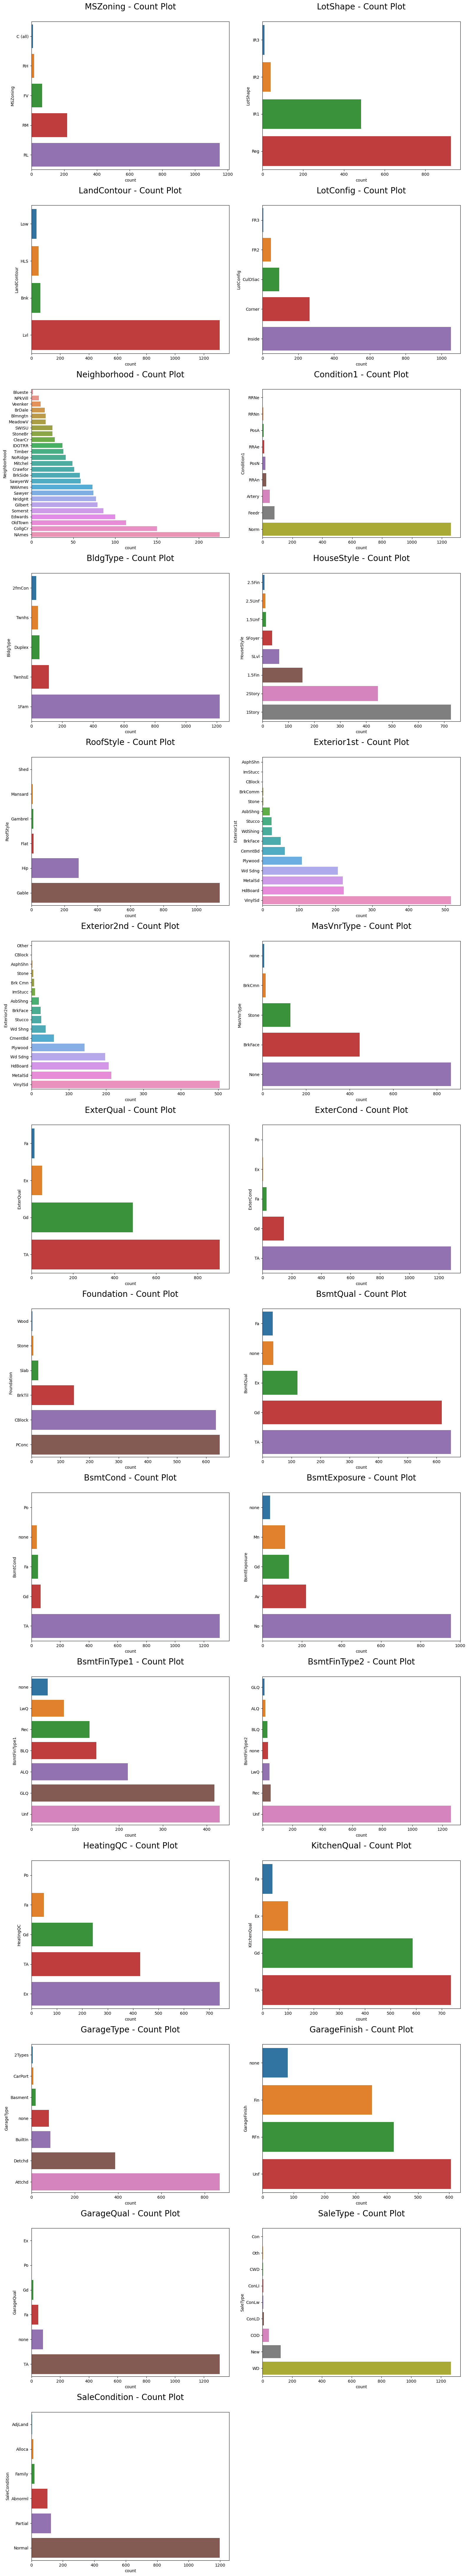

In [88]:
#Lets plot all the categorical columns
plt.figure(figsize=(16,112))#The size of the plot
x=0
for i in Cat_cols:
    x=x+1
    plt.subplot(18,2,x)
    sns.countplot(y=df_house[str(i)],order=df_house[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)#The title of the plot
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

Checking outliers

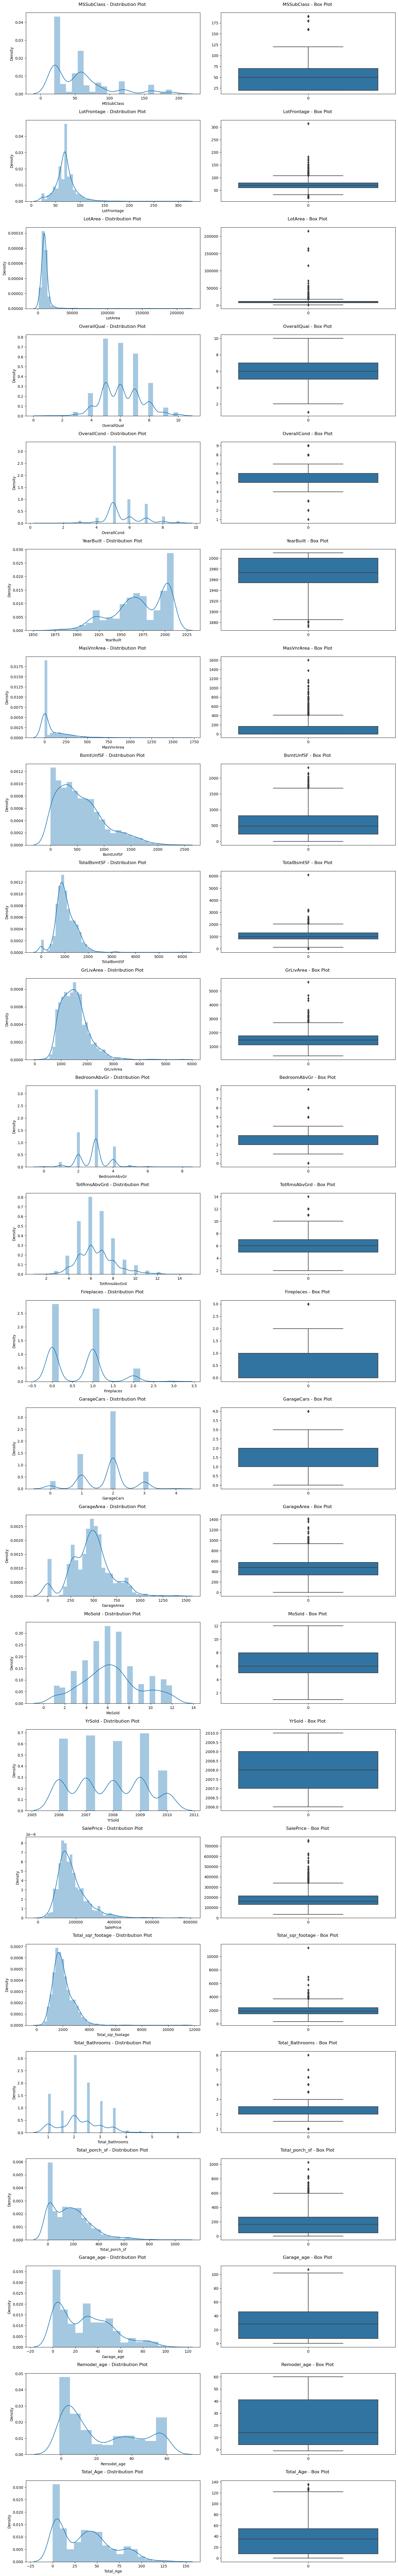

In [89]:
#Ploting the numerical columns and observe the outliers
plt.figure(figsize=(15,100))
c=0
for i in Num_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(df_house[str(i)])
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(df_house[str(i)])
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

In [ ]:
We can see there there multiple column with outliers

In [90]:
#Removing data above the 98 percentile
outlier = ['MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf','LotFrontage','LotArea']
for i in outlier:
    qnt = df_house[i].quantile(0.98)
    df_house = df_house[df_house[i] < qnt]

In [91]:
df_house.shape

(1287, 51)

Bivariant Analysis

In [92]:
num_cols = list(df_house.corr()["SalePrice"][(df_house.corr()["SalePrice"]>0.50) | (df_house.corr()["SalePrice"]<-0.50)].index)
num_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Garage_age',
 'Remodel_age',
 'Total_Age']

<Figure size 7100x10000 with 0 Axes>

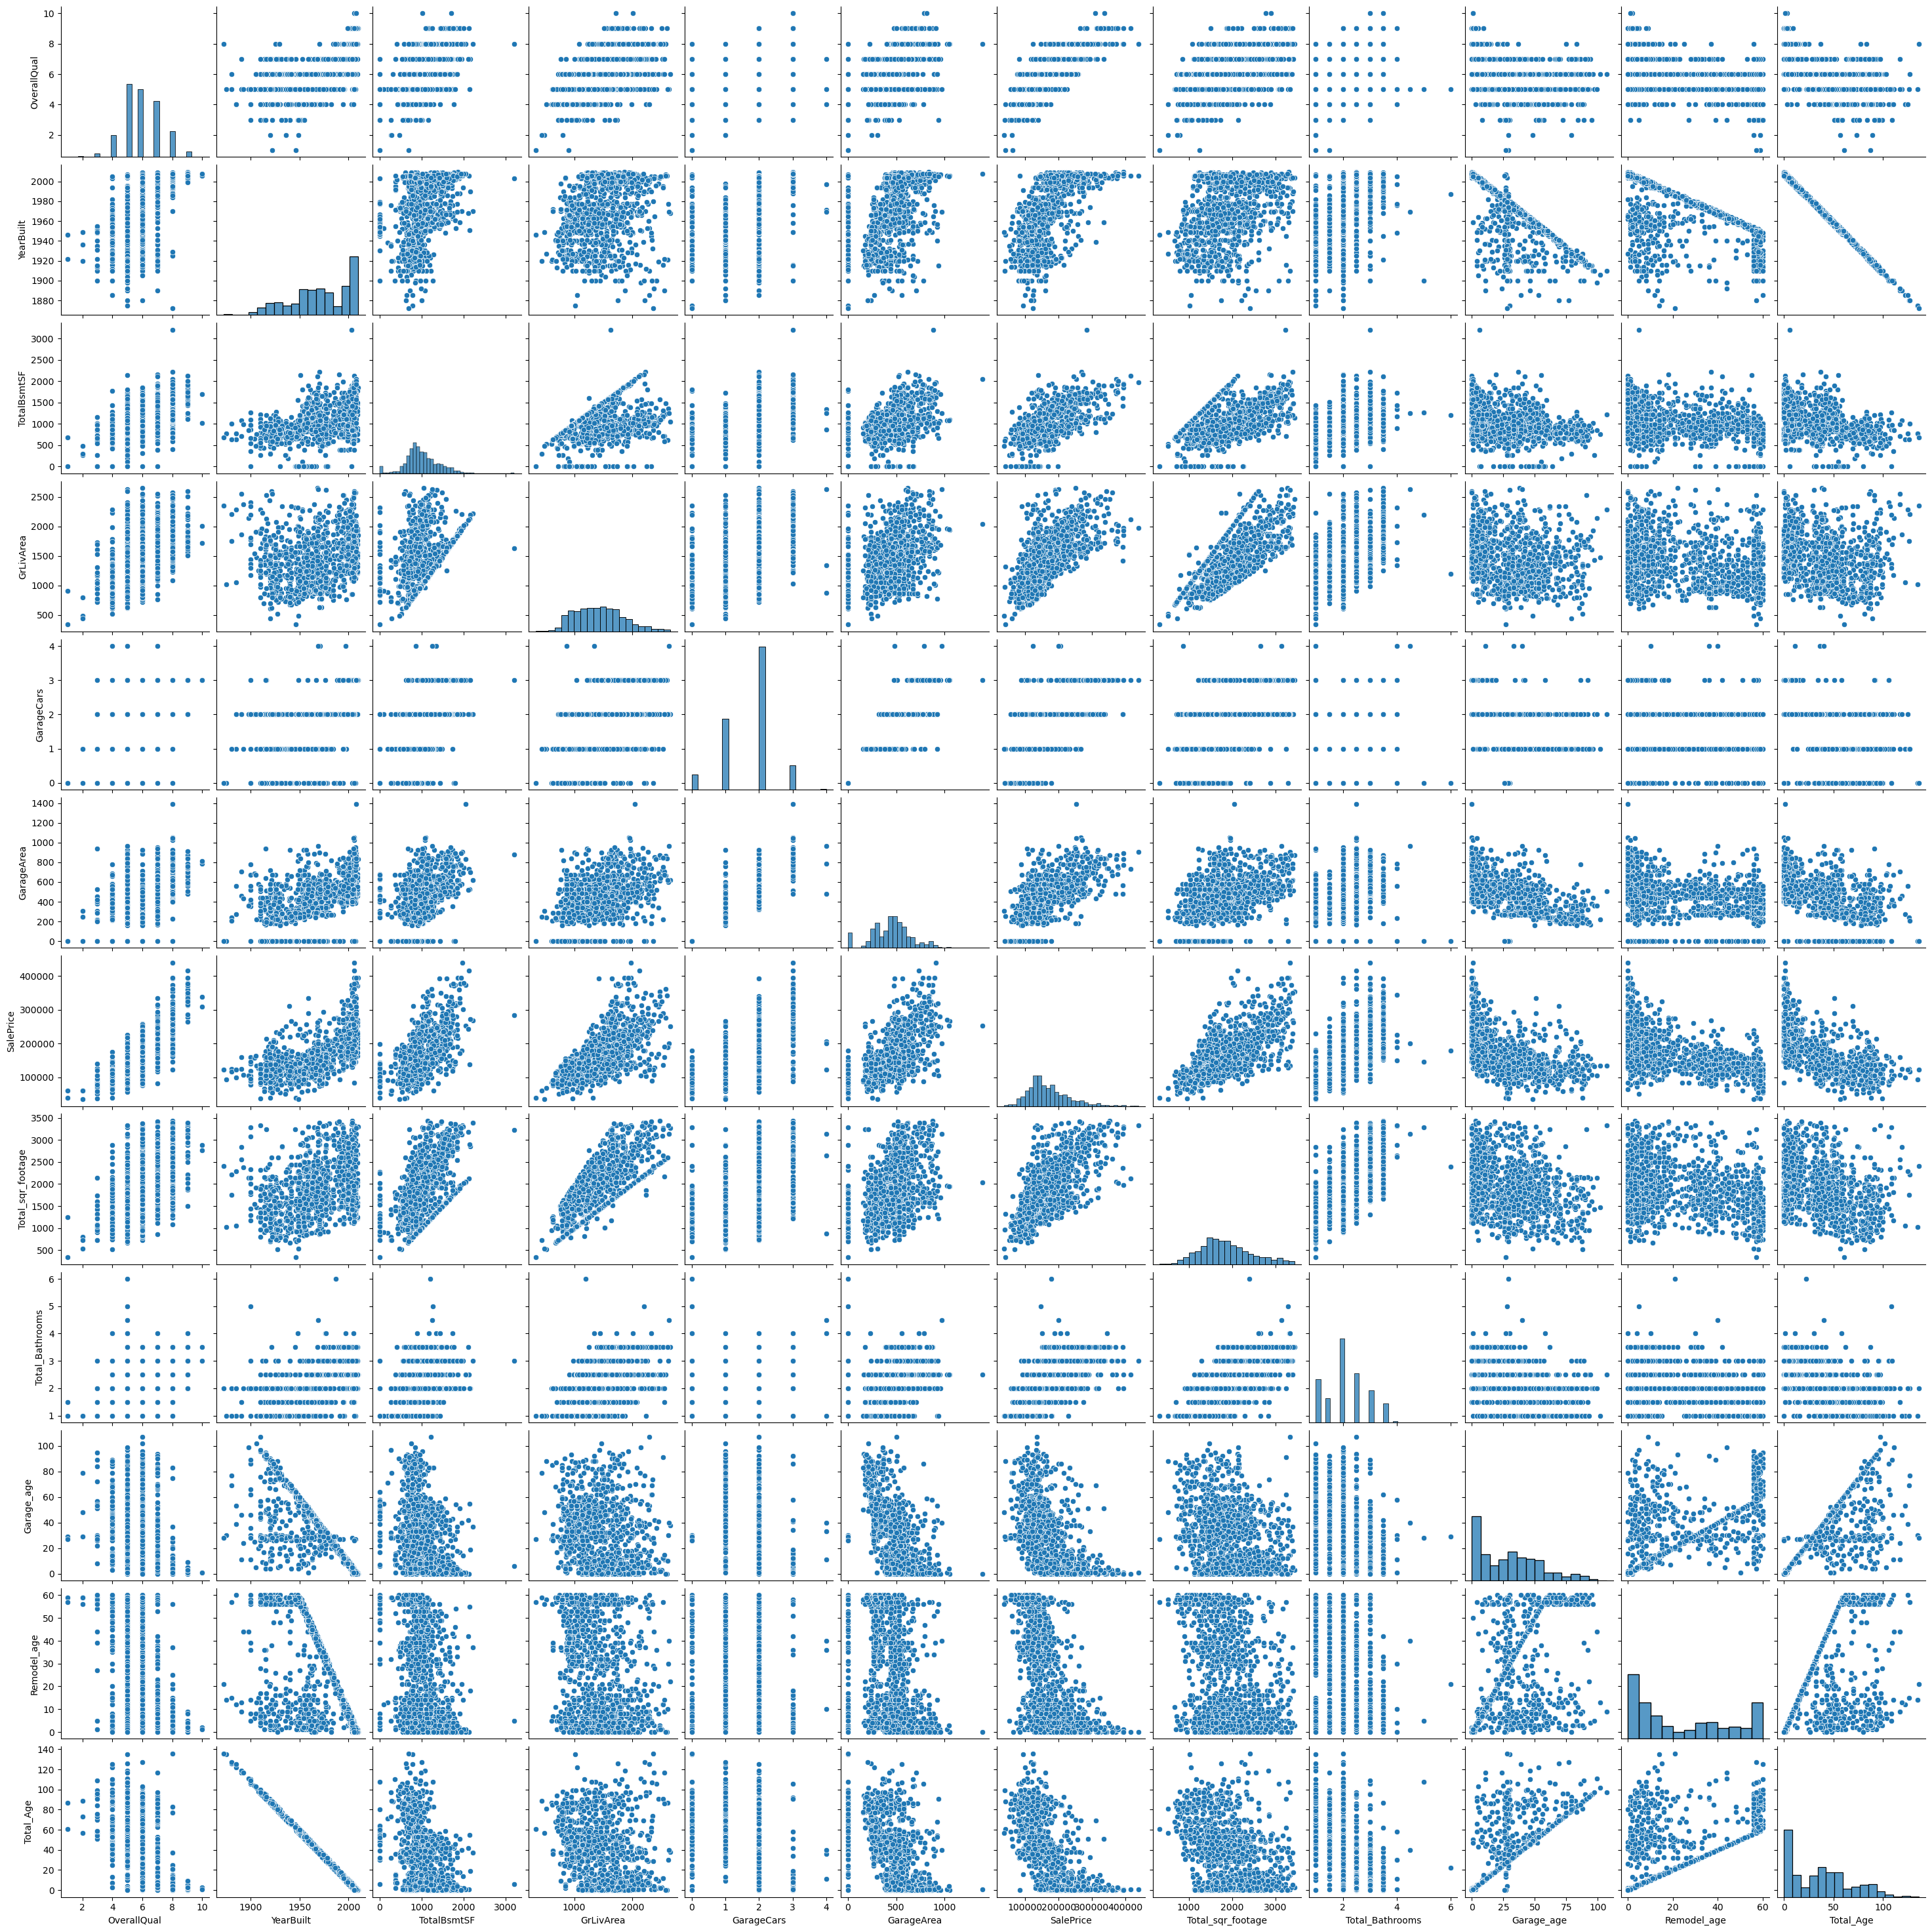

In [55]:
plt.figure(figsize = (71, 100))
sns.pairplot(df_house, vars= num_cols)
plt.show()

We can see that the SalesPrice increses with the increase of Total_sqr_footage and GrLivArea

Creating Dummy Variables for Categorical Columns

In [93]:
df_house = pd.get_dummies(df_house,drop_first=True)
df_house.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1458
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 458.7 KB


In [94]:
df_house.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...               0   
1         0.0        284         1262       1262  ...               0   
2       162.0        434          920       1786  ...               0   
3         0.0        540          756       1717  ...               0   
4       350.0        490         1145       2198  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 189 columns]

In [95]:
df_house.shape

(1287, 189)

Dividing data into Train and Test Set

In [96]:
df_train,df_test = train_test_split(df_house, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (900, 189)
The Size of Test data is (387, 189)


Scaling of feature variables

In [97]:

numerical_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        numerical_cols.append(i)
print("Below are the list of",len(numerical_cols) ,"Numerical Columns are :\n")
print(numerical_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Garage_age', 'Remodel_age', 'Total_Age']


In [98]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[numerical_cols] = Scaler.fit_transform(df_train[numerical_cols])

In [99]:
#Inspect the data in percentile after min-max Scaling
df_train[numerical_cols].describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  900.000000   900.000000  900.000000   900.000000   900.000000   
mean     0.231046     0.483038    0.387275     0.549136     0.507143   
std      0.263186     0.176664    0.161752     0.143571     0.157933   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.414894    0.295207     0.444444     0.428571   
50%      0.176471     0.510638    0.388172     0.555556     0.428571   
75%      0.352941     0.574468    0.477534     0.666667     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea   BsmtUnfSF  TotalBsmtSF   GrLivArea  ...  \
count  900.000000  900.000000  900.000000   900.000000  900.000000  ...   
mean     0.711095    0.125499    0.260899     0.311833    0.472827  ...   
std      0.219395    0.203694    0.203111     0.121446    0.178392  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.585145    0.000000    0.093234     0.243294    0.333082  ...   
50%      0.717391    0.000000    0.226780     0.296943    0.465517  ...   
75%      0.927536    0.209231    0.381306     0.378665    0.592780  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       GarageArea      MoSold      YrSold   SalePrice  Total_sqr_footage  \
count  900.000000  900.000000  900.000000  900.000000         900.000000   
mean     0.425204    0.481616    0.450000    0.325274           0.495557   
std      0.189978    0.246585    0.334975    0.147216           0.188138   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.292498    0.363636    0.250000    0.226567           0.366463   
50%      0.436847    0.454545    0.500000    0.295756           0.476160   
75%      0.531814    0.636364    0.750000    0.394597           0.600113   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Total_Bathrooms  Total_porch_sf  Garage_age  Remodel_age   Total_Age  
count       900.000000      900.000000  900.000000   900.000000  900.000000  
mean          0.323968        0.288504    0.283458     0.404778    0.276977  
std           0.206172        0.236446    0.225238     0.348014    0.223242  
min           0.000000        0.000000    0.000000     0.000000    0.000000  
25%           0.142857        0.065934    0.074766     0.083333    0.058824  
50%           0.285714        0.271062    0.271028     0.283333    0.268382  
75%           0.428571        0.445055    0.439252     0.720833    0.411765  
max           1.000000        1.000000    1.000000     1.000000    1.000000  

[8 rows x 24 columns]

Traning the model

In [100]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-train and remove it from X_train

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 997 to 900
Columns: 188 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(165)
memory usage: 313.8 KB


In [102]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 900 entries, 997 to 900
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
900 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


Model 1 - Automated Process using RFE

In [103]:
 #Fit the Model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 35),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 11),
 ('BsmtUnfSF', False, 46),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('MoSold', False, 41),
 ('YrSold', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', False, 16),
 ('Total_porch_sf', True, 1),
 ('Garage_age', False, 74),
 ('Remodel_age', False, 5),
 ('Total_Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 53),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 42),
 ('LandContour_HLS', False, 7),
 ('LandContour_Low', False, 36),
 ('LandContour_Lvl', False, 38),
 ('LotConfig_CulDSac', False, 65),
 ('LotConfig_FR2', False, 6),
 ('LotConfig_FR3', F

In [104]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'YrSold', 'Total_sqr_footage',
       'Total_porch_sf', 'Total_Age', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'RoofStyle_Gam

In [105]:
#List of columns NOT selected for RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'MoSold', 'Total_Bathrooms',
       'Garage_age', 'Remodel_age', 'LotShape_IR2', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Condition1_Feedr', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_MetalSd',
       'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterio

In [106]:
#Creating X_train using RFE selected variables
X_train_rfe = X_train[Rfe_Cols] 
X_train_rfe = sm.add_constant(X_train_rfe) 
X_train_rfe.shape

(900, 95)

In [107]:
#Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [108]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     132.6
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:18:14   Log-Likelihood:                 1667.0
No. Observations:                 900   AIC:                            -3160.
Df Residuals:                     813   BIC:                            -2742.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [109]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

Features     VIF
16              Total_Age     inf
85        GarageType_none     inf
70          BsmtQual_none     inf
71          BsmtCond_none     inf
86      GarageFinish_none     inf
5               YearBuilt     inf
13                 YrSold     inf
74      BsmtFinType1_none     inf
88        GarageQual_none     inf
80      GarageType_Attchd  132.39
84      GarageType_Detchd  108.86
19            MSZoning_RL   42.06
75      BsmtFinType2_none   34.84
94  SaleCondition_Partial   34.38
90           SaleType_New   33.51
73      BsmtExposure_none   31.66
20            MSZoning_RM   30.09
57    Exterior1st_VinylSd   26.34
62    Exterior2nd_VinylSd   24.82
82     GarageType_BuiltIn   23.83
61    Exterior2nd_CmentBd   19.89
52    Exterior1st_CemntBd   19.16
17            MSZoning_FV   15.48
69            BsmtQual_TA   12.12
79         KitchenQual_TA   10.55
78         KitchenQual_Gd    8.78
68            BsmtQual_Gd    8.16
7               GrLivArea    7.32
11             GarageCars    7.30
37   Neighborhood_Somerst    6.57
81     GarageType_Basment    6.55
12             GarageArea    6.26
58    Exterior1st_Wd Sdng    5.17
9            TotRmsAbvGrd    4.87
33   Neighborhood_OldTown    4.84
63    Exterior2nd_Wd Sdng    4.81
83     GarageType_CarPort    4.80
30     Neighborhood_NAmes    4.00
47        BldgType_TwnhsE    3.75
3             OverallQual    3.69
6             TotalBsmtSF    3.60
14      Total_sqr_footage    3.55
1              MSSubClass    3.31
18            MSZoning_RH    3.29
24   Neighborhood_CollgCr    3.22
8            BedroomAbvGr    2.75
25   Neighborhood_Edwards    2.71
27    Neighborhood_IDOTRR    2.62
2                 LotArea    2.55
46         BldgType_Twnhs    2.53
22   Neighborhood_BrkSide    2.52
77         KitchenQual_Fa    2.47
26   Neighborhood_Gilbert    2.43
67            BsmtQual_Fa    2.35
35    Neighborhood_Sawyer    2.26
32   Neighborhood_NridgHt    2.24
31    Neighborhood_NWAmes    2.09
93   SaleCondition_Normal    2.01
36   Neighborhood_SawyerW    2.00
53    Exterior1st_HdBoard    2.00
28   Neighborhood_MeadowV    1.87
55    Exterior1st_Plywood    1.73
29   Neighborhood_Mitchel    1.73
10             Fireplaces    1.67
34     Neighborhood_SWISU    1.63
4             OverallCond    1.62
64           ExterQual_Fa    1.57
39    Neighborhood_Timber    1.56
41        Condition1_Norm    1.49
38   Neighborhood_StoneBr    1.46
44        Condition1_RRAe    1.42
72        BsmtExposure_Gd    1.41
15         Total_porch_sf    1.35
45        Condition1_RRNn    1.33
92  SaleCondition_AdjLand    1.26
76           HeatingQC_Po    1.26
89         SaleType_ConLD    1.25
23   Neighborhood_ClearCr    1.22
43        Condition1_PosN    1.22
59    Exterior1st_WdShing    1.18
65           ExterCond_Po    1.18
40   Neighborhood_Veenker    1.18
87          GarageQual_Po    1.17
42        Condition1_PosA    1.15
49         RoofStyle_Shed    1.14
48      RoofStyle_Gambrel    1.14
21           LotShape_IR3    1.12
91           SaleType_Oth    1.09
50    Exterior1st_AsphShn    1.08
66        Foundation_Wood    1.08
54    Exterior1st_ImStucc    1.06
0                   const    0.00
51     Exterior1st_CBlock     NaN
56      Exterior1st_Stone     NaN
60     Exterior2nd_CBlock     NaN

Model Prediction and evaluation

In [111]:
#Lets extract the numerical columns from the df_train
Numeric_columns = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Numeric_columns.append(i)
print(Numeric_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Garage_age', 'Remodel_age', 'Total_Age']


In [112]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[Numeric_columns] = Scaler.fit_transform(df_test[Numeric_columns])

In [113]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') 
X_test = df_test

Ridge - Regularization

In [114]:
# Considering below alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.025288        -0.031119                1
14         3.0         -0.025773        -0.031133                2
15         4.0         -0.026268        -0.031268                3
12         1.0         -0.024801        -0.031403                4
16         5.0         -0.026741        -0.031453                5
11         0.9         -0.024750        -0.031464                6
10         0.8         -0.024698        -0.031536                7
9          0.7         -0.024645        -0.031618                8
17         6.0         -0.027187        -0.031688                9
8          0.6         -0.024591        -0.031713               10
7          0.5         -0.024537        -0.031825               11
18         7.0         -0.027620        -0.031949               12
6          0.4         -0.024478        -0.031958               13
5          0.3         -0.024416        -0.032126               14
19         8.0         -0.028037        -0.032214               15
4          0.2         -0.024351        -0.032335               16
20         9.0         -0.028436        -0.032478               17
3          0.1         -0.024279        -0.032613               18
21        10.0         -0.028823        -0.032734               19
2         0.01         -0.024211        -0.033045               20
1        0.001         -0.024207        -0.033137               21
0       0.0001         -0.024206        -0.033148               22
22          20         -0.031971        -0.035232               23
23          50         -0.038046        -0.040589               24
24         100         -0.044019        -0.046067               25
25         500         -0.061222        -0.062136               26

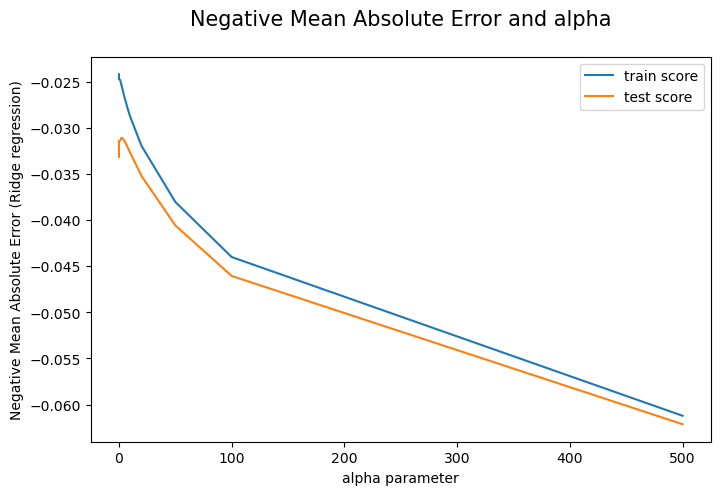

In [116]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [117]:
# Hyperparameter lambda = 1.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.07297733e-02,  1.70776784e-02,  7.16552927e-02,  1.21081821e-01,
        6.62730103e-02,  5.32019951e-02,  1.37598341e-02,  2.56028785e-02,
        5.88842706e-02,  1.06002403e-01, -2.14952372e-03,  3.86300362e-02,
        3.26932199e-02,  3.08983815e-02,  3.50018884e-02,  7.10975999e-03,
        4.96757247e-03,  1.24720804e-01,  1.80234863e-02,  3.42201974e-02,
       -3.84611047e-03, -1.96905685e-02, -5.38382723e-02,  3.83078922e-02,
        4.35426232e-03,  2.61857255e-02,  1.31914728e-02, -2.25345296e-03,
       -2.53531185e-02,  4.97534272e-03,  1.36005803e-02, -7.77758468e-03,
       -3.96797152e-03,  6.96058821e-03, -1.61674516e-02, -1.10794467e-02,
       -2.78499742e-03,  7.61614565e-03,  1.31409089e-02,  9.94072064e-03,
       -1.78698064e-02, -2.20734651e-02,  4.50913699e-02, -3.85552478e-02,
       -2.76091539e-02, -1.41098088e-02, -8.22286705e-03, -3.93045067e-02,
       -2.90800468e-02,  1.80242561e-02, -3.15619806e-02,  2.50899375e-02,
        5.98000443e-02, -

In [118]:
#Calculating the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.005157736700680511


In [119]:
#   predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9380892800285948


In [120]:
#   predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8466582827469347


In [121]:

alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.00504336039778577
The r2 value of train data is  0.9380892800285948
The r2 value of test data is  0.8466582827469347

The output when alpha is 2: 
The mean squared error value is  0.005157736700680511
The r2 value of train data is  0.9380892800285948
The r2 value of test data is  0.8466582827469347

The output when alpha is 3: 
The mean squared error value is  0.005264800827342182
The r2 value of train data is  0.9380892800285948
The r2 value of test data is  0.8466582827469347


As we can clearly the that the mean square error is slightly increasing with the increase of alpha value, so we can consider alpha = 1 as the best value

In [123]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0395
1              LotFrontage       0.0197
2                  LotArea       0.0676
3              OverallQual       0.1137
4              OverallCond       0.0620
5                YearBuilt       0.0487
6               MasVnrArea       0.0157
7                BsmtUnfSF       0.0257
8              TotalBsmtSF       0.0572
9                GrLivArea       0.1009
10            BedroomAbvGr       0.0008
11            TotRmsAbvGrd       0.0395
12              Fireplaces       0.0350
13              GarageCars       0.0304
14              GarageArea       0.0366
15                  MoSold       0.0073
16                  YrSold       0.0048
17       Total_sqr_footage       0.1188
18         Total_Bathrooms       0.0205
19          Total_porch_sf       0.0342
20              Garage_age      -0.0043
21             Remodel_age      -0.0212
22               Total_Age      -0.0493
23             MSZoning_FV       0.0318
24             MSZoning_RH       0.0018
25             MSZoning_RL       0.0229
26             MSZoning_RM       0.0086
27            LotShape_IR2      -0.0017
28            LotShape_IR3      -0.0211
29            LotShape_Reg       0.0044
30         LandContour_HLS       0.0142
31         LandContour_Low      -0.0068
32         LandContour_Lvl      -0.0037
33       LotConfig_CulDSac       0.0075
34           LotConfig_FR2      -0.0150
35           LotConfig_FR3      -0.0087
36        LotConfig_Inside      -0.0025
37    Neighborhood_Blueste       0.0064
38     Neighborhood_BrDale       0.0124
39    Neighborhood_BrkSide       0.0113
40    Neighborhood_ClearCr      -0.0152
41    Neighborhood_CollgCr      -0.0208
42    Neighborhood_Crawfor       0.0452
43    Neighborhood_Edwards      -0.0360
44    Neighborhood_Gilbert      -0.0265
45     Neighborhood_IDOTRR      -0.0135
46    Neighborhood_MeadowV      -0.0092
47    Neighborhood_Mitchel      -0.0360
48      Neighborhood_NAmes      -0.0268
49    Neighborhood_NPkVill       0.0165
50     Neighborhood_NWAmes      -0.0279
51    Neighborhood_NoRidge       0.0241
52    Neighborhood_NridgHt       0.0592
53    Neighborhood_OldTown      -0.0224
54      Neighborhood_SWISU      -0.0137
55     Neighborhood_Sawyer      -0.0178
56    Neighborhood_SawyerW      -0.0066
57    Neighborhood_Somerst       0.0116
58    Neighborhood_StoneBr       0.0638
59     Neighborhood_Timber      -0.0124
60    Neighborhood_Veenker       0.0049
61        Condition1_Feedr       0.0011
62         Condition1_Norm       0.0159
63         Condition1_PosA       0.0326
64         Condition1_PosN       0.0223
65         Condition1_RRAe      -0.0365
66         Condition1_RRAn      -0.0082
67         Condition1_RRNe      -0.0014
68         Condition1_RRNn       0.0134
69         BldgType_2fmCon      -0.0046
70         BldgType_Duplex      -0.0241
71          BldgType_Twnhs      -0.0261
72         BldgType_TwnhsE      -0.0209
73       HouseStyle_1.5Unf       0.0058
74       HouseStyle_1Story      -0.0039
75       HouseStyle_2.5Fin      -0.0071
76       HouseStyle_2.5Unf      -0.0060
77       HouseStyle_2Story       0.0020
78       HouseStyle_SFoyer      -0.0003
79         HouseStyle_SLvl      -0.0034
80         RoofStyle_Gable       0.0015
81       RoofStyle_Gambrel       0.0123
82           RoofStyle_Hip       0.0027
83       RoofStyle_Mansard       0.0019
84          RoofStyle_Shed      -0.0113
85     Exterior1st_AsphShn      -0.0032
86     Exterior1st_BrkComm      -0.0053
87     Exterior1st_BrkFace       0.0236
88      Exterior1st_CBlock       0.0000
89     Exterior1st_CemntBd      -0.0143
90     Exterior1st_HdBoard      -0.0050
91     Exterior1st_ImStucc       0.0015
92     Exterior1st_MetalSd      -0.0008
93     Exterior1st_Plywood      -0.0001
94       Exterior1st_Stone       0.0000
95      Exterior1st_Stucco       0.0177
96     Exterior1st_VinylSd      -0.0078
97     Exterior1st_Wd Sdng      -0.0145
98     Exterior1st_WdShing      -0.0047
99     Exterior2nd

In [124]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0395,
 'LotFrontage': 0.0197,
 'LotArea': 0.0676,
 'OverallQual': 0.1137,
 'OverallCond': 0.062,
 'YearBuilt': 0.0487,
 'MasVnrArea': 0.0157,
 'BsmtUnfSF': 0.0257,
 'TotalBsmtSF': 0.0572,
 'GrLivArea': 0.1009,
 'BedroomAbvGr': 0.0008,
 'TotRmsAbvGrd': 0.0395,
 'Fireplaces': 0.035,
 'GarageCars': 0.0304,
 'GarageArea': 0.0366,
 'MoSold': 0.0073,
 'YrSold': 0.0048,
 'Total_sqr_footage': 0.1188,
 'Total_Bathrooms': 0.0205,
 'Total_porch_sf': 0.0342,
 'Garage_age': -0.0043,
 'Remodel_age': -0.0212,
 'Total_Age': -0.0493,
 'MSZoning_FV': 0.0318,
 'MSZoning_RH': 0.0018,
 'MSZoning_RL': 0.0229,
 'MSZoning_RM': 0.0086,
 'LotShape_IR2': -0.0017,
 'LotShape_IR3': -0.0211,
 'LotShape_Reg': 0.0044,
 'LandContour_HLS': 0.0142,
 'LandContour_Low': -0.0068,
 'LandContour_Lvl': -0.0037,
 'LotConfig_CulDSac': 0.0075,
 'LotConfig_FR2': -0.015,
 'LotConfig_FR3': -0.0087,
 'LotConfig_Inside': -0.0025,
 'Neighborhood_Blueste': 0.0064,
 'Neighborhood_BrDale': 0.0124,
 'Neighborhood_BrkSide

In [125]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [126]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0          OverallQual         True            1       0.1137
4            GrLivArea         True            1       0.1009
1          OverallCond         True            1       0.0620
3          TotalBsmtSF         True            1       0.0572
2            YearBuilt         True            1       0.0487
5           GarageCars         True            1       0.0304
6               YrSold         True            1       0.0048
18     GarageType_none         True            1       0.0024
19   GarageFinish_none         True            1       0.0024
9   Exterior1st_CBlock         True            1       0.0000

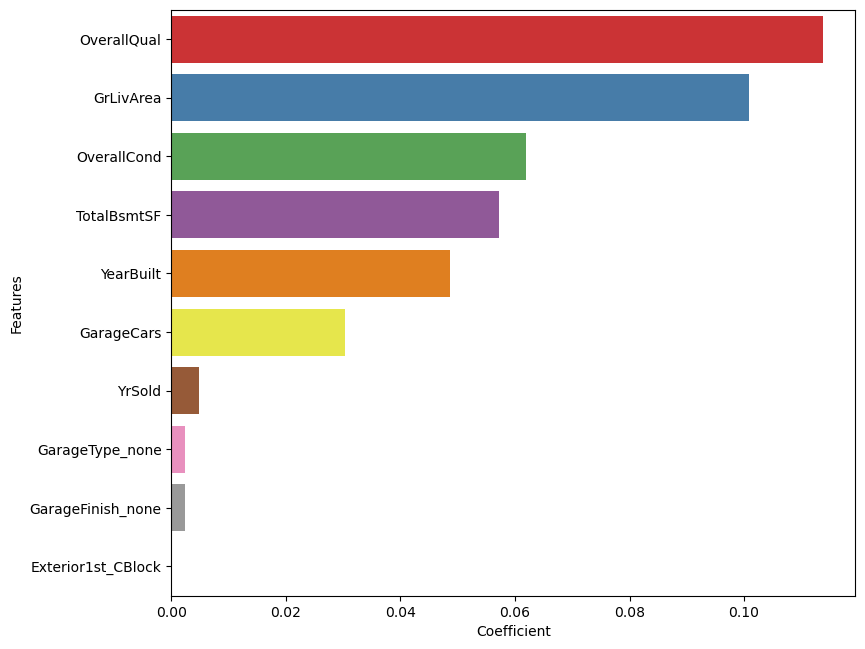

In [127]:
# bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

Lasso - Regularization

In [128]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.025934        -0.031113                1
1       0.0002         -0.027096        -0.031307                2
2       0.0003         -0.028009        -0.031760                3
3       0.0004         -0.028868        -0.032221                4
4       0.0005         -0.029681        -0.032676                5
5        0.001         -0.033130        -0.035376                6
6        0.002         -0.038266        -0.040084                7
7        0.003         -0.042100        -0.043614                8
8        0.004         -0.046423        -0.047783                9
9        0.005         -0.050267        -0.051427               10
10        0.01         -0.066105        -0.066889               11

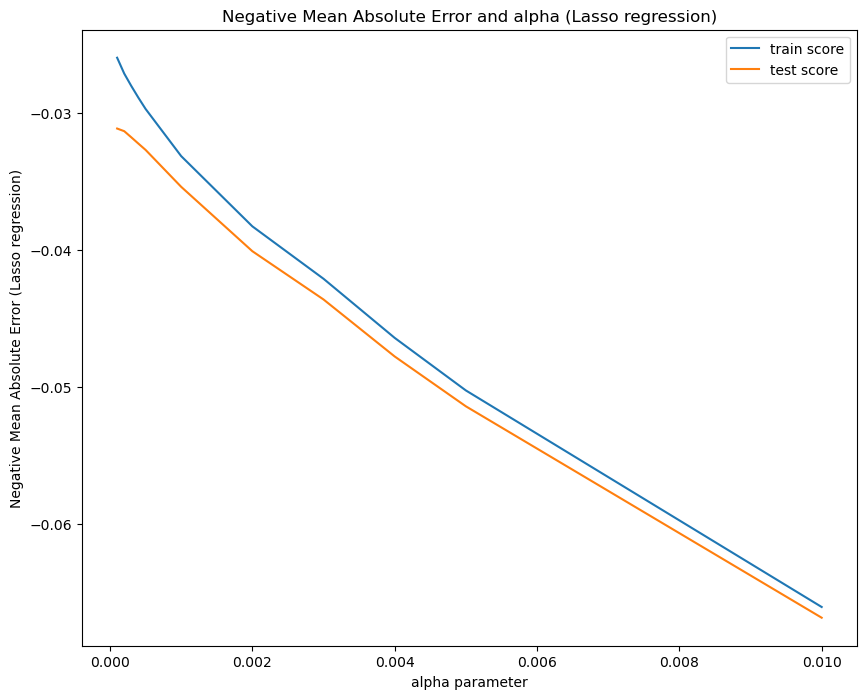

In [130]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [131]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [132]:
# # Hyperparameter lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.46034791e-02,  1.30904356e-02,  7.08292740e-02,  1.55596269e-01,
        8.05090379e-02,  1.25969346e-01,  1.05811346e-02,  6.78360950e-02,
        0.00000000e+00,  6.54873531e-02, -0.00000000e+00,  2.32749324e-02,
        2.72480897e-02,  3.49799768e-02,  3.15249950e-02,  2.35323075e-03,
        2.34909658e-03,  2.09338775e-01,  5.97715365e-03,  3.36668943e-02,
       -1.61297471e-03, -1.61643718e-02, -0.00000000e+00,  3.06038718e-02,
       -0.00000000e+00,  1.58005027e-02,  0.00000000e+00, -0.00000000e+00,
       -1.02545046e-02,  4.57354632e-03,  1.18016091e-02, -0.00000000e+00,
       -0.00000000e+00,  6.77613532e-03, -1.10407700e-02, -0.00000000e+00,
       -1.59816229e-03,  0.00000000e+00,  9.49572947e-03,  1.87425798e-02,
       -1.15224123e-04, -1.09841239e-02,  5.36760495e-02, -2.52066906e-02,
       -1.54439289e-02, -0.00000000e+00, -0.00000000e+00, -3.11954896e-02,
       -1.94716020e-02,  1.73573117e-02, -2.31258613e-02,  3.13313930e-02,
        6.66585173e-02, -

In [133]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.005766729281816666


In [134]:
#Predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.9351556313812798
The r2 value of train data is  0.9351556313812798


In [135]:
#Predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8285526729407044


In [136]:
# house_pricing_lasso: Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0               MSSubClass      -0.0446
1              LotFrontage       0.0131
2                  LotArea       0.0708
3              OverallQual       0.1556
4              OverallCond       0.0805
5                YearBuilt       0.1260
6               MasVnrArea       0.0106
7                BsmtUnfSF       0.0678
8                GrLivArea       0.0655
9             TotRmsAbvGrd       0.0233
10              Fireplaces       0.0272
11              GarageCars       0.0350
12              GarageArea       0.0315
13                  MoSold       0.0024
14                  YrSold       0.0023
15       Total_sqr_footage       0.2093
16         Total_Bathrooms       0.0060
17          Total_porch_sf       0.0337
18              Garage_age      -0.0016
19             Remodel_age      -0.0162
20             MSZoning_FV       0.0306
21             MSZoning_RL       0.0158
22            LotShape_IR3      -0.0103
23            LotShape_Reg       0.0046
24         LandContour_HLS       0.0118
25       LotConfig_CulDSac       0.0068
26           LotConfig_FR2      -0.0110
27        LotConfig_Inside      -0.0016
28     Neighborhood_BrDale       0.0095
29    Neighborhood_BrkSide       0.0187
30    Neighborhood_ClearCr      -0.0001
31    Neighborhood_CollgCr      -0.0110
32    Neighborhood_Crawfor       0.0537
33    Neighborhood_Edwards      -0.0252
34    Neighborhood_Gilbert      -0.0154
35    Neighborhood_Mitchel      -0.0312
36      Neighborhood_NAmes      -0.0195
37    Neighborhood_NPkVill       0.0174
38     Neighborhood_NWAmes      -0.0231
39    Neighborhood_NoRidge       0.0313
40    Neighborhood_NridgHt       0.0667
41    Neighborhood_OldTown      -0.0126
42     Neighborhood_Sawyer      -0.0102
43    Neighborhood_Somerst       0.0125
44    Neighborhood_StoneBr       0.0706
45         Condition1_Norm       0.0143
46         Condition1_PosA       0.0273
47         Condition1_PosN       0.0172
48         Condition1_RRAe      -0.0438
49         Condition1_RRAn      -0.0015
50         BldgType_Duplex      -0.0224
51          BldgType_Twnhs      -0.0178
52         BldgType_TwnhsE      -0.0123
53       HouseStyle_1Story      -0.0045
54       HouseStyle_2Story       0.0005
55       HouseStyle_SFoyer       0.0001
56       RoofStyle_Gambrel       0.0060
57           RoofStyle_Hip      -0.0008
58     Exterior1st_BrkFace       0.0181
59     Exterior1st_HdBoard      -0.0005
60     Exterior1st_MetalSd       0.0015
61      Exterior1st_Stucco       0.0096
62     Exterior1st_Wd Sdng      -0.0082
63     Exterior2nd_BrkFace      -0.0024
64     Exterior2nd_CmentBd       0.0128
65     Exterior2nd_HdBoard      -0.0075
66     Exterior2nd_Plywood      -0.0131
67      Exterior2nd_Stucco      -0.0035
68     Exterior2nd_VinylSd       0.0016
69     Exterior2nd_Wd Sdng       0.0052
70     Exterior2nd_Wd Shng      -0.0143
71      MasVnrType_BrkFace       0.0034
72            ExterQual_Fa      -0.0063
73            ExterQual_TA      -0.0073
74            ExterCond_Fa       0.0049
75            ExterCond_Gd      -0.0051
76       Foundation_CBlock       0.0028
77        Foundation_PConc       0.0139
78             BsmtQual_Fa      -0.0147
79             BsmtQual_Gd      -0.0335
80             BsmtQual_TA      -0.0289
81             BsmtCond_Gd       0.0016
82             BsmtCond_TA       0.0113
83         BsmtExposure_Gd       0.0354
84         BsmtExposure_No      -0.0061
85        BsmtFinType1_GLQ       0.0078
86        BsmtFinType1_LwQ      -0.0094
87        BsmtFinType1_Rec      -0.0047
88        BsmtFinType1_Unf      -0.0021
89        BsmtFinType2_LwQ      -0.0071
90        BsmtFinType2_Rec      -0.0048
91        BsmtFinType2_Unf       0.0075
92            HeatingQC_Fa       0.0041
93            HeatingQC_Gd      -0.0032
94            HeatingQC_TA      -0.0042
95          KitchenQual_Fa      -0.0522
96          KitchenQual_Gd      -0.0607
97          KitchenQual_TA      -0.0619
98       GarageType_Attchd       0.0010
99       GarageTyp

In [137]:
# Printing dictionary of Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.04460347914363668,
 'LotFrontage': 0.013090435585208674,
 'LotArea': 0.07082927399523992,
 'OverallQual': 0.15559626914170885,
 'OverallCond': 0.08050903789664828,
 'YearBuilt': 0.12596934556748235,
 'MasVnrArea': 0.010581134554648937,
 'BsmtUnfSF': 0.06783609503792022,
 'TotalBsmtSF': 0.0,
 'GrLivArea': 0.06548735311109637,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.023274932402631572,
 'Fireplaces': 0.027248089744352846,
 'GarageCars': 0.03497997678278479,
 'GarageArea': 0.031524994962662964,
 'MoSold': 0.002353230749754682,
 'YrSold': 0.0023490965837393483,
 'Total_sqr_footage': 0.20933877459223482,
 'Total_Bathrooms': 0.005977153649870404,
 'Total_porch_sf': 0.03366689429120656,
 'Garage_age': -0.001612974707561837,
 'Remodel_age': -0.016164371773956257,
 'Total_Age': -0.0,
 'MSZoning_FV': 0.030603871834769324,
 'MSZoning_RH': -0.0,
 'MSZoning_RL': 0.015800502742408466,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.010254504606747514,
 'LotShape_R

In [138]:
# RFE : minimising features to 20

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [139]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
6      Total_sqr_footage         True            1     0.209339
1            OverallQual         True            1     0.155596
3              YearBuilt         True            1     0.125969
2            OverallCond         True            1     0.080509
0                LotArea         True            1     0.070829
10  Neighborhood_StoneBr         True            1     0.070592
4              BsmtUnfSF         True            1     0.067836
9   Neighborhood_NridgHt         True            1     0.066659
7   Neighborhood_Crawfor         True            1     0.053676
5             GarageCars         True            1     0.034980

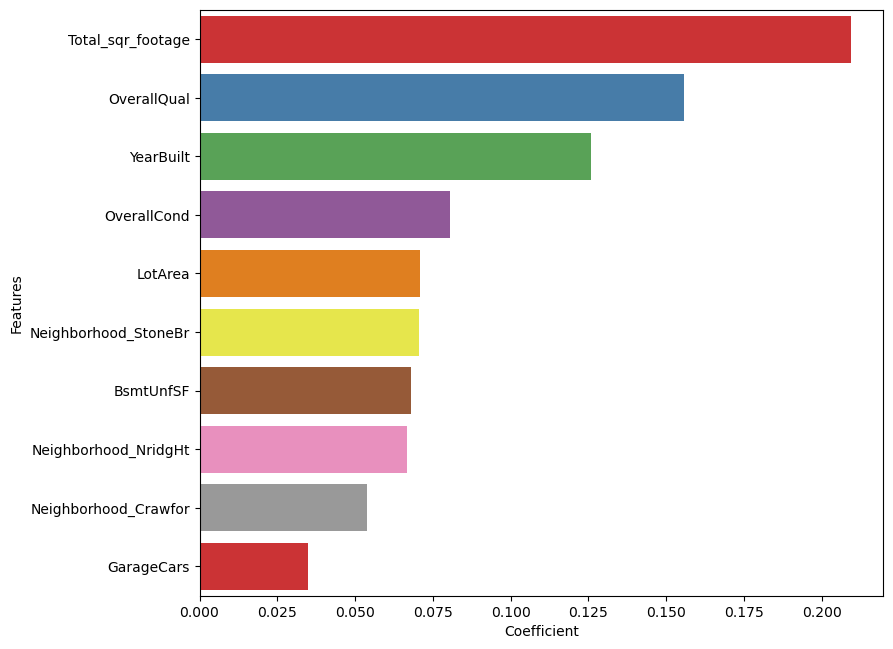

In [140]:
# Creating bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [141]:
#Prediting the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8285526729407044


Conclusion

The optimal value of LAMBDA we got in case of Ridge and Lasso is :

Ridge - 1.0
Lasso - 0.0001
The r2 value we got in case:

Ridge - Train = 0.938 , Test = 0.846
Lasso - Train = 0.935 , Test = 0.828
The Mean Squared error in case of Ridge and Lasso is:

Ridge - 0.0051
Lasso - 0.0057
We can clearly observe that the Mean Squared Error of Lasso is slightly higher than that of Ridge.
Ridge is better than Lasso.

In [142]:
#Lets find for Ridge first
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 4: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 2: 
The mean squared error value is  0.005157736700680511
The r2 value of train data is  0.9351556313812798
The r2 value of test data is  0.8285526729407044

The output when alpha is 4: 
The mean squared error value is  0.005366769510131085
The r2 value of train data is  0.9351556313812798
The r2 value of test data is  0.8285526729407044


In [143]:
 #Creating a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 4 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 4 are :

                      Coefficient
Total_sqr_footage        0.114039
OverallQual              0.107455
GrLivArea                0.096923
LotArea                  0.064562
Neighborhood_StoneBr     0.060874
Neighborhood_NridgHt     0.058338
OverallCond              0.058193
TotalBsmtSF              0.055710
YearBuilt                0.045110
Neighborhood_Crawfor     0.044898


In [144]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0001: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)


alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0002: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 0.0001: 
The mean squared error value is  0.005766729281816666
The r2 value of train data is  0.9351556313812798
The r2 value of test data is  0.8285526729407044

The output when alpha is 0.0002: 
The mean squared error value is  0.005847947609925391
The r2 value of train data is  0.9304871539868095
The r2 value of test data is  0.8261380173218995


In [145]:
#Creating a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0002 are:

                      Coefficient
Total_sqr_footage        0.206047
OverallQual              0.165152
YearBuilt                0.113917
GrLivArea                0.074476
OverallCond              0.073281
LotArea                  0.065542
Neighborhood_NridgHt     0.063349
BsmtUnfSF                0.060813
Neighborhood_StoneBr     0.060591
Neighborhood_Crawfor     0.052213
